## Notebook Summary: McDonald's Customer Segmentation Analysis 🍔📊

This notebook analyzes McDonald's customer data to understand preferences and segment customers for targeted marketing and retention strategies.

**Key Steps and Insights:**

* **Data Loading and Exploration:**
    * Imports essential libraries: pandas, NumPy, seaborn, matplotlib.
    * Loads the dataset (`mcdonalds.csv`) into a pandas DataFrame.
    * Explores data using `head()`, `info()`, `describe()`, `value_counts()`, histograms, and distribution plots.
* **Data Preprocessing:**
    * Handles outliers in 'Age' using IQR method and box plots.
    * Imputes missing values with mode (categorical) and mean (numerical).
    * Applies Label Encoding to categorical features using `LabelEncoder()`.
* **Principal Component Analysis (PCA):**
    * Reduces data dimensionality and identifies key preference drivers.
    * Applies `PCA()` to encoded categorical features.
    * Visualizes explained variance and relationships with scree plots and biplots.
* **Customer Segmentation:**
    * Applies KMeans clustering to encoded features.
    * Uses Elbow method (`KElbowVisualizer`) for optimal cluster number.
    * Analyzes clusters using descriptive statistics, mosaic plots, and box plots.
* **KModes Clustering:**
    * Applies KModes for refined segmentation (suitable for categorical data).
    * Uses Elbow method to determine optimal cluster number for KModes.
    * Analyzes clusters using descriptive statistics and visualizations.

**Insights:**

* **Taste Improvement Initiative:** Gather feedback from specific customer segments (Clusters 0 and 1) to enhance flavors. 🎯
* **Customer Retention Strategy:** Develop targeted retention programs for specific segments (Clusters 3 and 4) using personalized rewards. 🎁
* **Age-Based Targeting:** Focus on customers below 40 years of age in Cluster 3 for retention efforts. 👨‍👩‍👧‍👦
* **Overall Preferences:** Gain insights into customer preferences for McDonald's attributes like taste, convenience, price, and healthiness. 👍

**Key Functions and Libraries:**

* **pandas:** `read_csv()`, `head()`, `info()`, `describe()`, `value_counts()`, `groupby()`, `apply()`, `map()`, `crosstab()`
* **NumPy:** `mean()`, `quantile()`, `where()`
* **seaborn:** `histplot()`, `boxplot()`, `scatterplot()`, `catplot()`
* **matplotlib:** `hist()`, `show()`, `plot()`, `xlabel()`, `ylabel()`, `title()`
* **scikit-learn:** `LabelEncoder()`, `PCA()`, `KMeans()`, `OrdinalEncoder()`
* **kmodes:** `KModes()`, `cost_`
* **yellowbrick:** `KElbowVisualizer()`
* **statsmodels:** `mosaic()`

**Machine Learning Algorithms:**

* **KMeans Clustering**
* **KModes Clustering**
* **Principal Component Analysis (PCA)**

😊🍔📊📈💡

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [183]:
!pip install kmodes

In [184]:
#clustering model library
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
!pip install bioinfokit

In [185]:
data = pd.read_csv("/content/mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [186]:
data['VisitFrequency'].count()

1453

In [187]:
data['VisitFrequency'].value_counts() # Assuming '0' is a value in the 'VisitFrequency' column

,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [188]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=data)

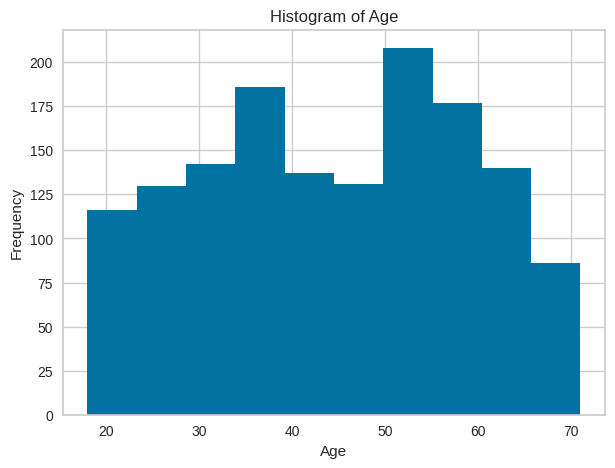

In [189]:
# prompt: Using dataframe data: histogram

import matplotlib.pyplot as plt
# Create the histogram
plt.hist(data['Age'], bins=10)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Display the histogram
plt.show()


In [190]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [192]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


# Insights:
**Age Distribution**:25% of customers are young adults (18-33 years old), while the remaining 75% are almost evenly split between those aged 34-45 and those above 45 years.

**Surprising Trend**: Nearly 50% of customers consuming junk food are over 45 years old, highlighting a demographic shift in fast-food consumption

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_mcdonalds_visits(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Create age groups
    df['AgeGroup'] = df['Age'].apply(lambda x: 'Over 45' if x > 45 else '45 or Under')

    # Calculate visit frequency percentages for each age group
    visit_freq_by_age = pd.crosstab(df['VisitFrequency'], df['AgeGroup'], normalize='columns') * 100

    # Sort the frequencies in a logical order
    freq_order = ['More than once a week', 'Once a week', 'Once a month',
                  'Every three months', 'Once a year', 'Never']
    visit_freq_by_age = visit_freq_by_age.reindex(freq_order)

    # Set up the plotting style
    plt.style.use('seaborn')
    plt.figure(figsize=(12, 8))

    # Create the bar plot
    ax = visit_freq_by_age.plot(kind='bar', width=0.8)

    # Customize the plot
    plt.title('Visit Frequency Comparison by Age Group', fontsize=14, pad=20)
    plt.xlabel('Visit Frequency')
    plt.ylabel('Percentage of Age Group (%)')
    plt.legend(title='Age Group')
    plt.style.use('seaborn-v0_8')
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add value labels on the bars
    for i in ax.containers:
        ax.bar_label(i, fmt='%.1f%%', padding=3)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Optional: Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    return plt

def get_detailed_stats(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Create age groups
    df['AgeGroup'] = df['Age'].apply(lambda x: 'Over 45' if x > 45 else '45 or Under')

    # Get detailed statistics for each age group
    stats = {}
    for age_group in ['Over 45', '45 or Under']:
        group_data = df[df['AgeGroup'] == age_group]

        # Calculate visit frequency distribution
        freq_dist = group_data['VisitFrequency'].value_counts()
        total_count = len(group_data)

        # Calculate percentages
        freq_percentages = (freq_dist / total_count * 100).round(2)

        stats[age_group] = {
            'total_count': total_count,
            'frequency_distribution': freq_dist.to_dict(),
            'frequency_percentages': freq_percentages.to_dict()
        }

    return stats



In [194]:
data['AgeGroup'] = data['Age'].apply(lambda x: 'Over 45' if x > 45 else '45 or Under')

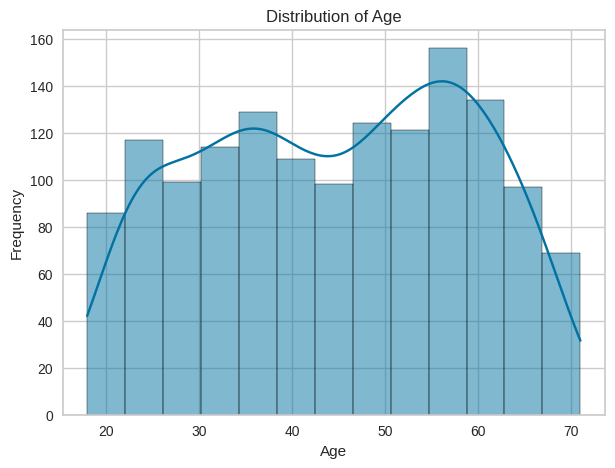

In [195]:
# Drawing the distribution plot for Age feature
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [196]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'AgeGroup'],
      dtype='object')

In [197]:
col =list(data.columns)

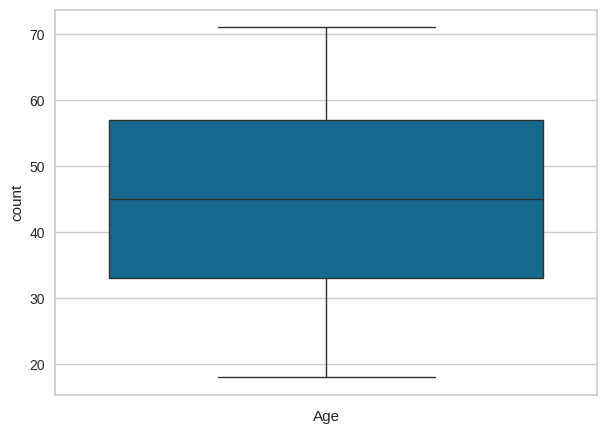

In [198]:
#handling outlier
for col_name in col:
    if(data[col_name].dtype=='int64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [199]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

24.0


In [200]:
# data = data[~((data < (Q1-1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]

In [201]:
data.shape

(1453, 16)

In [202]:
#Handling Missing values
data.isna().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [203]:
col_list = list(data.columns)
print(col_list)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender', 'AgeGroup']


In [204]:
for col in col_list:
    if data[col].dtype =='object':
        data[col] = data[col].fillna(data[col].mode()[0])

    else:
        data[col] = data[col].fillna(data[col].mean())


In [205]:
data.isna().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [206]:
data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

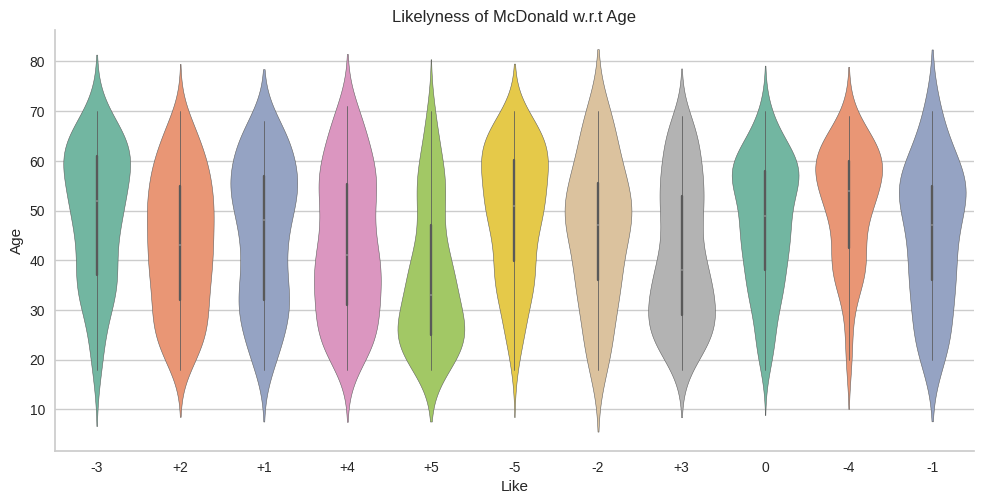

In [207]:
sns.catplot(x="Like", y="Age",data=data,
            orient="v", height=5, aspect=2, palette="Set2",kind="violin")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

## Insights:
- People age around 18-30 yr's are more likely to buy!
- People age around 55-71 yr's are less likely to buy!

In [208]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,AgeGroup
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,Over 45
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,Over 45
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,Over 45
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,Over 45
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,Over 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,Over 45
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,45 or Under
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,Over 45
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,45 or Under


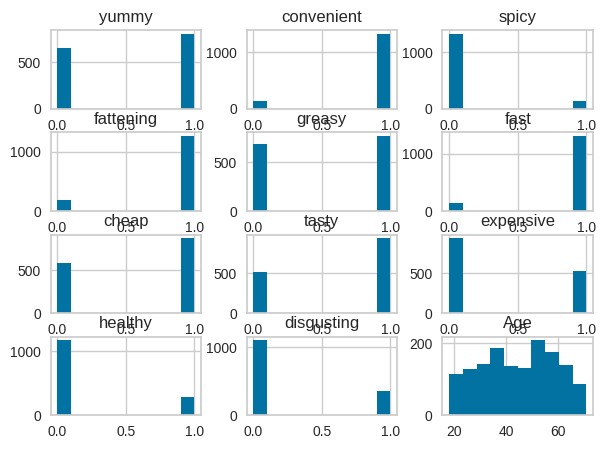

In [209]:
#Histogram of the each attributes
# plt.rcParams['figure.figsize'] = (12,14)
data.hist()
plt.show()

In [210]:
#Considering only first 11 attributes
data_eleven = data.loc[:,cat]
data_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [211]:
#Considering only the 11 cols and converting it into array
x = data.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [212]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.425367,0.219079,-0.663255,-0.401300,-0.201705,0.389767,-0.211982,-0.163235,-0.181007,-0.515706,0.567074
1,0.218638,-0.388190,0.730827,-0.094724,-0.044669,0.086596,-0.095877,0.034756,-0.111476,-0.493313,0.500440
2,-0.375415,-0.730435,0.122040,0.692262,-0.839643,0.687406,0.583112,-0.364379,0.322288,-0.061759,-0.242741
3,0.172926,0.352752,0.843795,0.206998,0.681415,0.036133,-0.054284,0.231477,0.028003,0.250678,0.051034
4,-0.187057,0.807610,-0.028537,0.548332,-0.854074,0.097305,-0.457043,-0.171758,0.074409,-0.031897,-0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.550242,-0.275031,0.013737,0.200604,0.145063,-0.306575,-0.075308,-0.345552,0.136589,0.432798,0.456076
1449,0.957339,-0.014308,-0.303843,0.444350,0.133690,-0.381804,-0.326432,-0.878047,0.304441,0.247443,0.193671
1450,0.185894,-1.062662,-0.220857,-0.467643,0.187757,0.192703,-0.091597,0.036576,-0.038255,-0.056518,0.012800
1451,1.182064,0.038570,-0.561561,0.701126,-0.047645,-0.193687,-0.027335,0.339374,-0.022267,0.002573,0.105316


In [213]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [214]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [215]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,0.476933,-0.363790,0.304444,0.055162,0.307535,-0.170738,-0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,-0.142425,-0.277608,0.347830,-0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,0.197619,-0.070620,0.355087,0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,-0.354139,0.073405,0.406515,-0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,0.253960,-0.361399,-0.209347,0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,-0.097363,-0.107930,0.594632,-0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,0.118958,0.128973,0.103241,-0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,-0.002547,0.210899,0.076914,0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,0.067816,0.003125,0.261342,-0.068385,-0.029539,-0.066996,-0.454399,0.490069


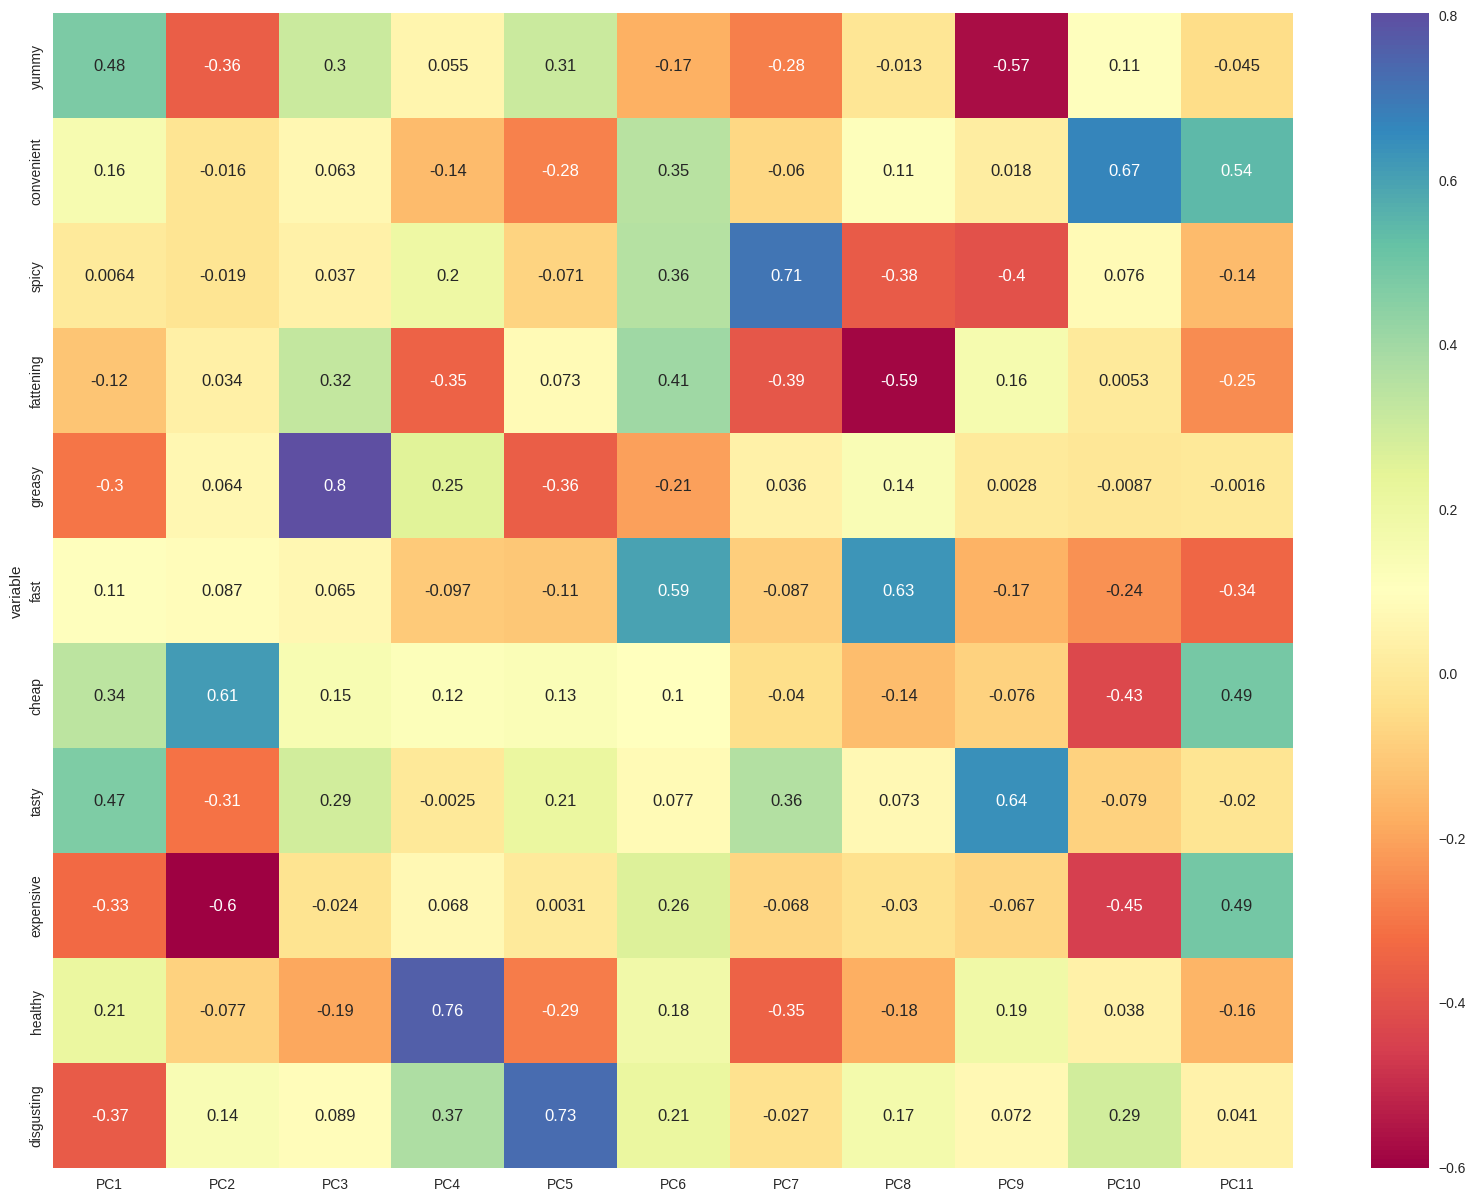

In [216]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

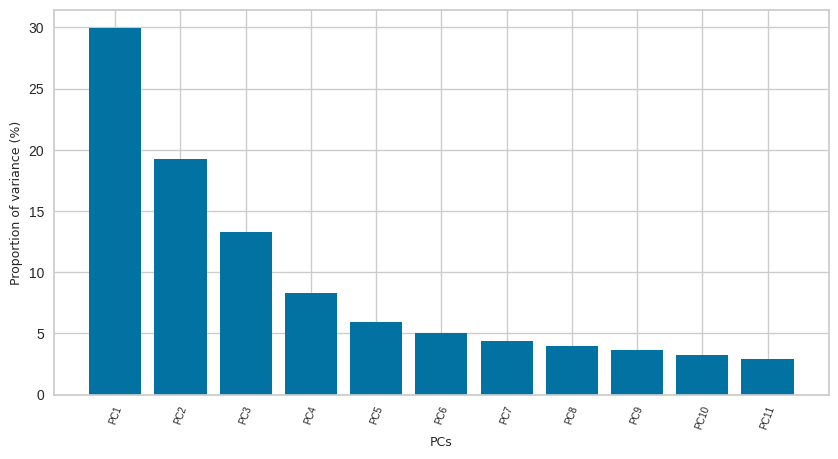

In [217]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

In [218]:
ar = PCA().fit_transform(x)
ar.shape

(1453, 11)

In [219]:
loadings.shape

(11, 11)

In [220]:
data.columns.values

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
       'Age', 'VisitFrequency', 'Gender', 'AgeGroup'], dtype=object)

In [221]:
round(pca.explained_variance_ratio_[0]*100, 2)

29.94

In [222]:
# get PC scores
pca_scores = PCA().fit_transform(x)

pca_scores.shape

(1453, 11)

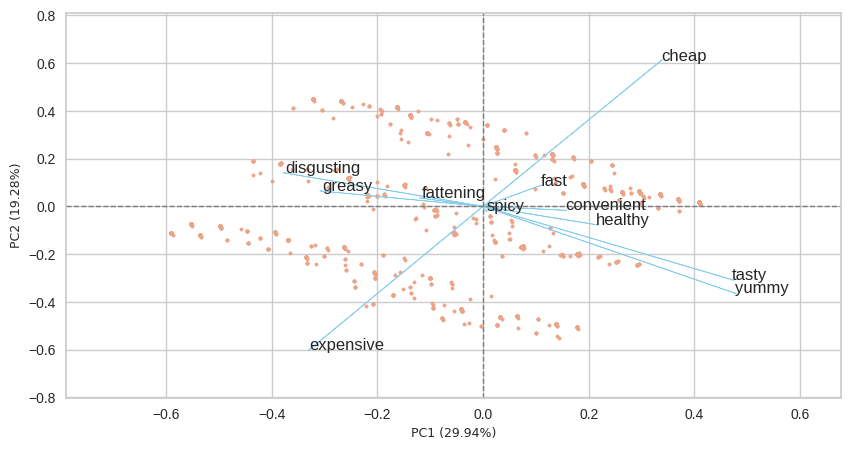

In [223]:

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

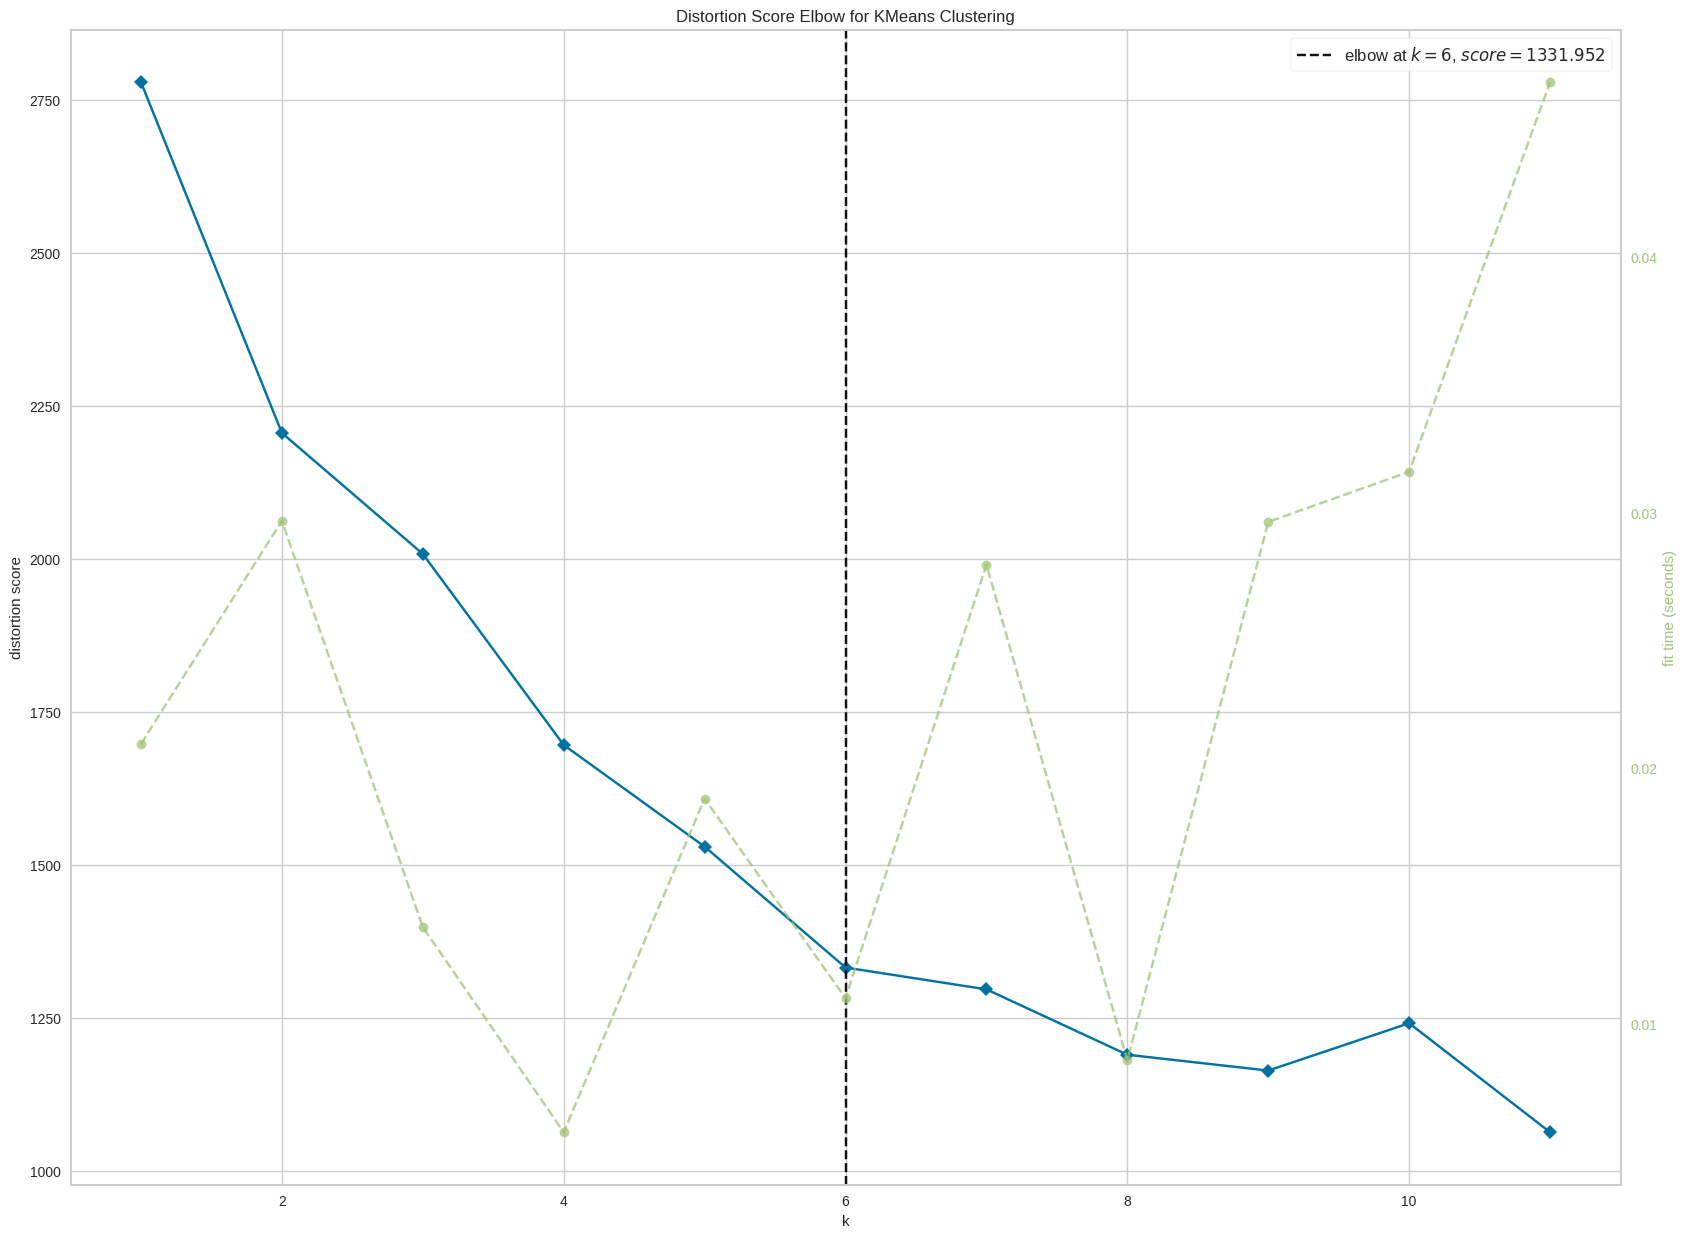

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [224]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data_eleven)
visualizer.show()

In [225]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data_eleven)
data['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 3 1 ... 1 3 1]
1748.968752115803
9
[[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -1.44328993e-15
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [ 1.44328993e-15  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]


In [226]:
kmeans.labels_

array([0, 3, 1, ..., 1, 3, 1], dtype=int32)

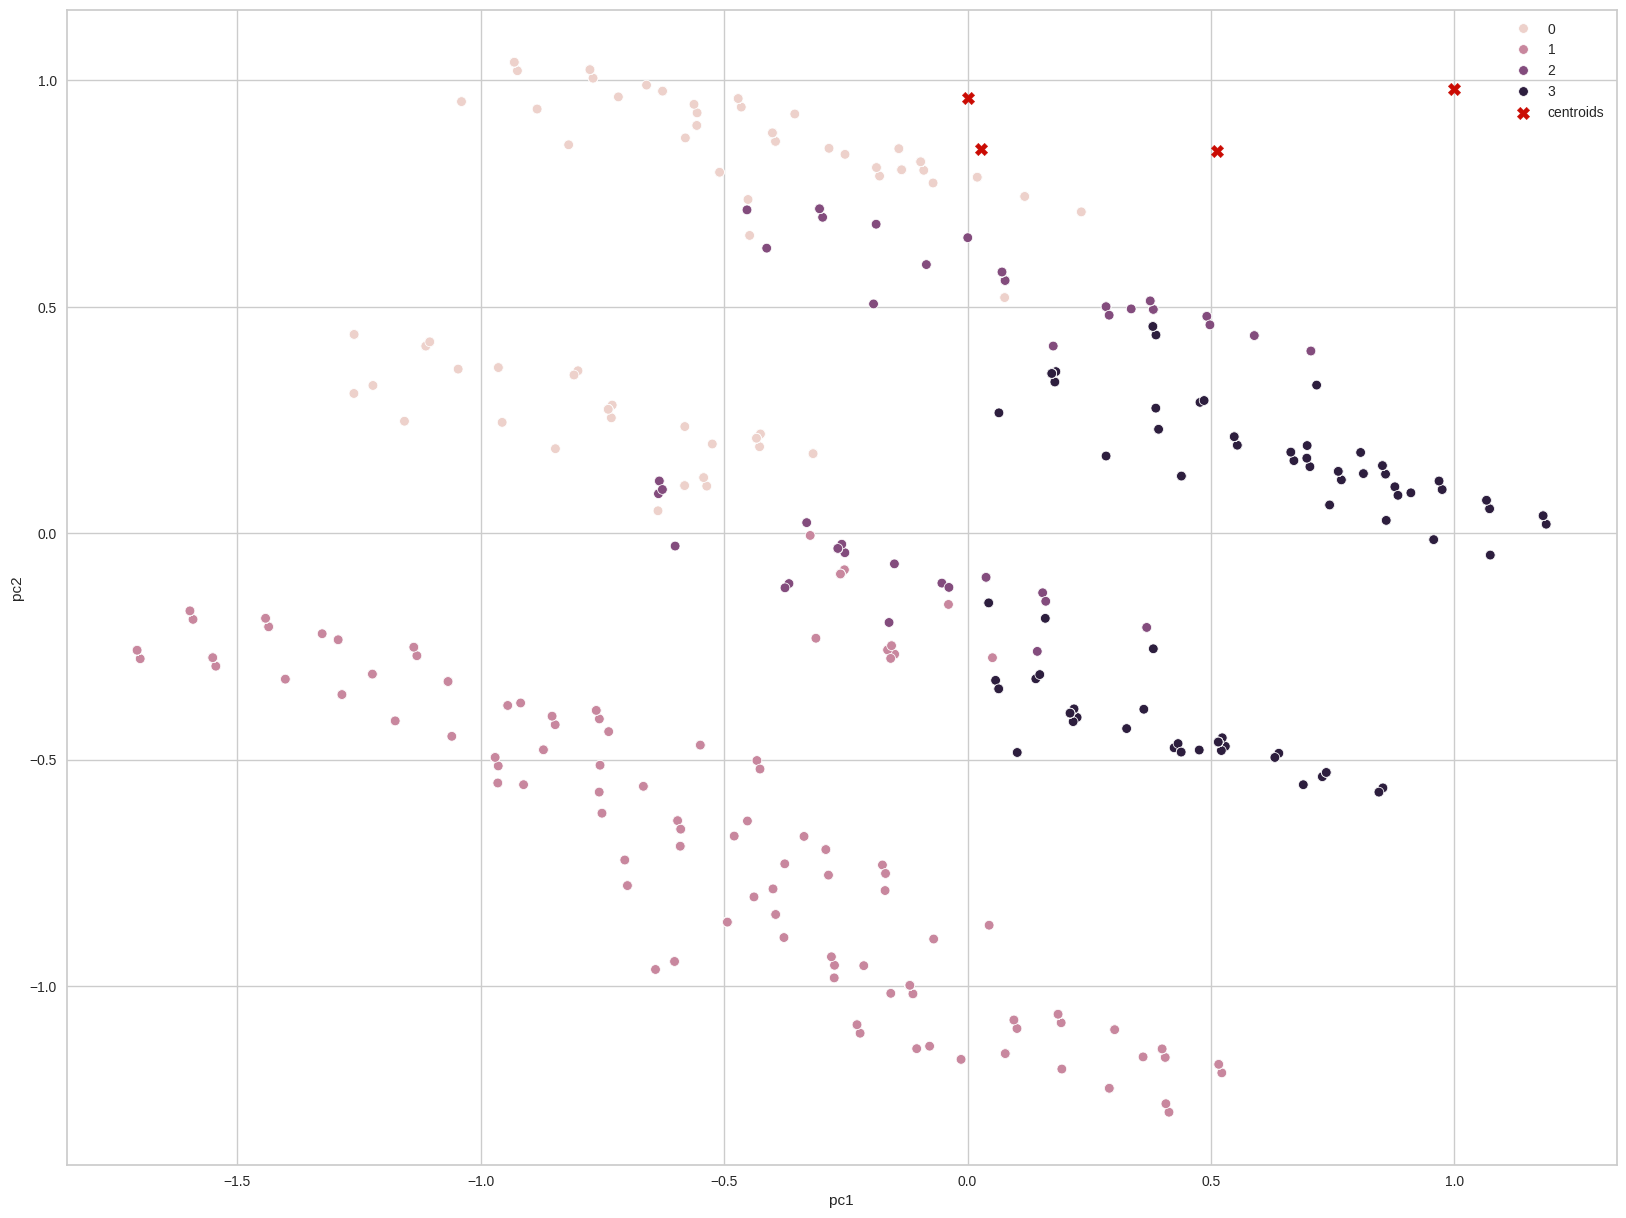

In [227]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [228]:
data['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
-5,152
+5,143
-3,73
-4,71


In [229]:
data['Like'].unique()

array(['-3', '+2', '+1', '+4', '+5', '-5', '-2', '+3', '0', '-4', '-1'],
      dtype=object)

In [230]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data['cluster_num'],data['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,71,37,36,27,22,44,19,27,12,1,0
1,73,26,30,22,16,63,47,56,66,40,34
2,6,5,7,5,11,29,34,20,10,4,0
3,2,3,0,5,9,33,52,84,141,115,109


 # Based on the customer segmentation analysis using KMeans:

### Taste Improvement Initiative:

- Prioritize gathering detailed feedback from customer segments in Clusters 0 and 1 through targeted surveys and focus groups.
- Implement a systematic taste testing program with these customer groups to identify specific areas for flavor enhancement.
- Use their insights to refine existing menu items and develop new ones that better match their taste preferences.


### Customer Retention Strategy:

- Develop targeted retention programs specifically for customer segments in Clusters 3 and 4.
- Implement personalized loyalty rewards and promotions tailored to these segments' preferences and buying patterns.
- Create engagement campaigns that address the specific pain points causing lower retention in these clusters.
- Monitor retention metrics for these segments on a monthly basis to measure the effectiveness of implemented strategies.

In [231]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,168,128
1,214,259
2,75,56
3,331,222


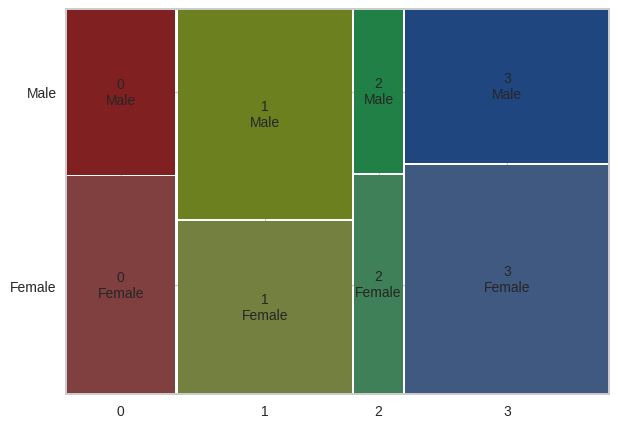

In [232]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

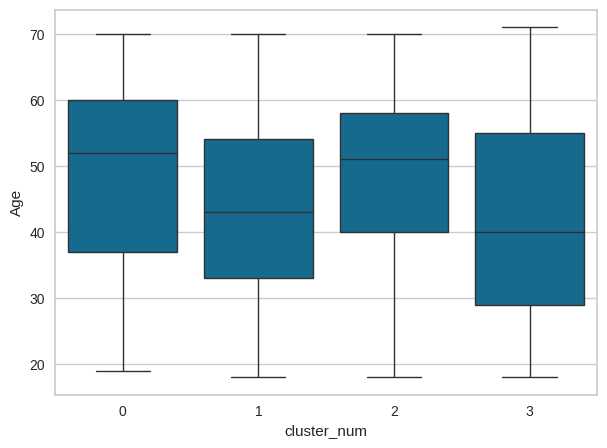

In [233]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=data)

## Insight:

To optimize resource allocation for customer retention within Cluster 3, focusing on customers below 40 years of age is recommended, as they constitute 50% of this segment. This targeted approach can be achieved by offering incentives such as rewards and discounts.

Selecting target segment

In [234]:
data['VisitFrequency'].value_counts()

,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [235]:
LabelEncoder().fit_transform(data['VisitFrequency'])

array([0, 0, 0, ..., 3, 0, 0])

In [236]:
data['cluster_num'][:10]

,cluster_num
0,0
1,3
2,1
3,3
4,0
5,3
6,1
7,3
8,1
9,1


In [237]:
#Calculating the mean
#Visit frequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [238]:
#Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [239]:
like_mapping = {
       '-5': 0,
       '-4': 1,
       '-3': 2,
       '-2': 3,
       '-1': 4,
       '0': 5,
       '+1': 6,
       '+2': 7,
       '+3': 8,
       '+4': 9,
       '+5': 10
   }

data['Like_Encoded'] = data['Like'].map(like_mapping)

In [240]:
# data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like_Encoded'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like_Encoded
0,0,3.060811
1,1,5.143763
2,2,5.213740
3,3,7.905967


In [241]:
segment = Gender.merge(Like, on='cluster_num',).merge(visit, on='cluster_num', how='right')
segment

,cluster_num,Gender,Like_Encoded,VisitFrequency
0,0,0.432432,3.060811,2.787162
1,1,0.547569,5.143763,2.596195
2,2,0.427481,5.213740,2.618321
3,3,0.401447,7.905967,2.598553


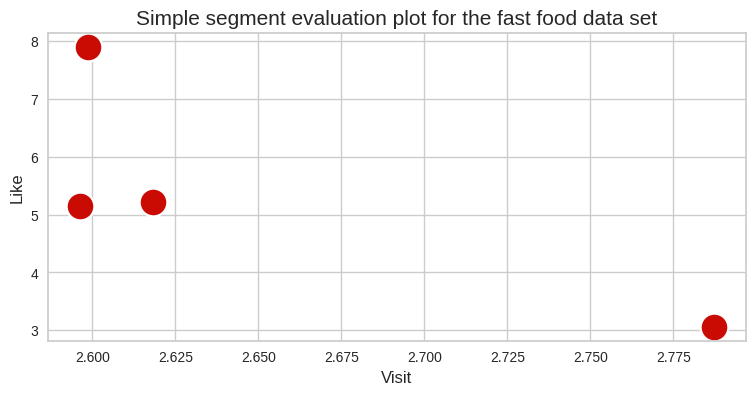

In [243]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like_Encoded",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()

In [244]:
!pip install kmodes

In [245]:
from kmodes.kmodes import KModes

In [246]:
segment

,cluster_num,Gender,Like_Encoded,VisitFrequency
0,0,0.432432,3.060811,2.787162
1,1,0.547569,5.143763,2.596195
2,2,0.427481,5.213740,2.618321
3,3,0.401447,7.905967,2.598553


In [247]:
data_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [248]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,AgeGroup,cluster_num,Like_Encoded
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,Over 45,0,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0,Over 45,3,7
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0,Over 45,1,6
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0,Over 45,3,9
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1,Over 45,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1,Over 45,1,0
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,4,0,45 or Under,3,7
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,3,0,Over 45,1,8
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,0,1,45 or Under,3,9


In [249]:
# data['Like'].value_counts()

In [250]:
# data['Like_Encoded'].value_counts()

In [251]:
df_new = data.drop(['cluster_num','AgeGroup',"Like"], axis=1)
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender,Like_Encoded
0,0,1,0,1,0,1,1,0,1,0,0,61,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,51,0,0,7
2,0,1,1,1,1,1,0,1,1,1,0,62,0,0,6
3,1,1,0,1,1,1,1,1,0,0,1,69,4,0,9
4,0,1,0,1,1,1,1,0,0,1,0,49,3,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,47,5,1,0
1449,1,1,0,1,0,0,1,1,0,1,0,36,4,0,7
1450,1,1,0,1,0,1,0,1,1,0,0,52,3,0,8
1451,1,1,0,0,0,1,1,1,0,1,0,41,0,1,9


Text(0.5, 1.0, 'Elbow Curve')

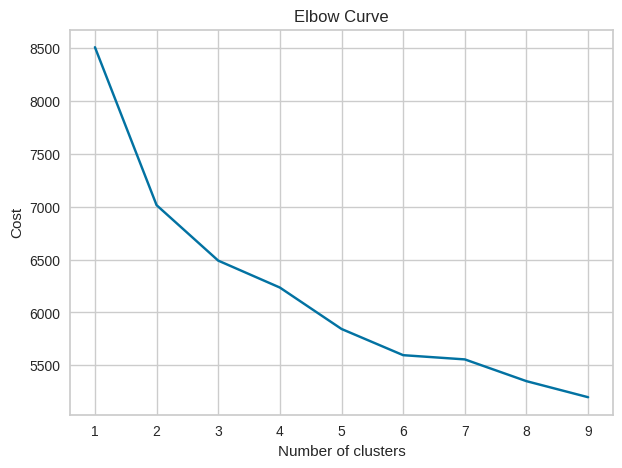

In [252]:
import matplotlib.pyplot as plt

cost = []
K = range(1,10)

for k in K:
  kmode = KModes(n_clusters=k,init='random',n_init=5,verbose=0)
  kmode.fit_predict(df_new)
  cost.append(kmode.cost_)

plt.plot(K,cost,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')


In [253]:
# Building the Model with all the categorical variables
kmode = KModes(n_clusters = 2, init='random',n_init=3,verbose=0)
clusters = kmode.fit_predict(df_new)


In [254]:
clusters.shape

(1453,)

In [255]:
df_new['cluster_no'] = clusters

In [256]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender,Like_Encoded,cluster_no
0,0,1,0,1,0,1,1,0,1,0,0,61,0,0,2,0
1,1,1,0,1,1,1,1,1,1,0,0,51,0,0,7,1
2,0,1,1,1,1,1,0,1,1,1,0,62,0,0,6,0
3,1,1,0,1,1,1,1,1,0,0,1,69,4,0,9,1
4,0,1,0,1,1,1,1,0,0,1,0,49,3,1,7,0


In [257]:
df_new.groupby(df_new['cluster_no'])['Age'].mean()

,Age
cluster_no,
0,47.037147
1,42.506410


In [262]:
df_new.groupby(df_new['cluster_no'])['Like_Encoded'].mean()

,Like_Encoded
cluster_no,
0,3.592868
1,7.661538


In [261]:
crosstab =pd.crosstab(df_new['cluster_no'],df_new['Like_Encoded'])
#Reordering cols
# crosstab = crosstab[['0','1','2','3','4','5','6','7','8','9','10']]
crosstab

Like_Encoded,0,1,2,3,4,5,6,7,8,9,10
cluster_no,,,,,,,,,,,
0,148,68,65,51,44,114,71,59,14,20,19
1,4,3,8,8,14,55,81,128,215,140,124


# Insights:

- Given the categorical nature of the data, KModes clustering resulted in 2 distinct customer segments, while KMeans, which is more suited for numerical data, identified 4 segments.

- This refined segmentation provides a clearer understanding of customer preferences, enabling the company to effectively allocate resources and develop targeted strategies for business growth


## Based on the customer segmentation analysis using KModes Clustering:

### Taste Improvement Initiative:

- Prioritize gathering detailed feedback from customer segments in Clusters 0 through targeted surveys and focus groups.
- Implement a systematic taste testing program with these customer groups to identify specific areas for flavor enhancement.
- Use their insights to refine existing menu items and develop new ones that better match their taste preferences.


### Customer Retention Strategy:

- Develop targeted retention programs specifically for customer segments in Clusters 1.
- Implement personalized loyalty rewards and promotions tailored to these segments' preferences and buying patterns.
- Create engagement campaigns that address the specific pain points causing lower retention in these clusters.
- Monitor retention metrics for these segments on a monthly basis to measure the effectiveness of implemented strategies.


<Axes: xlabel='cluster_no', ylabel='Age'>

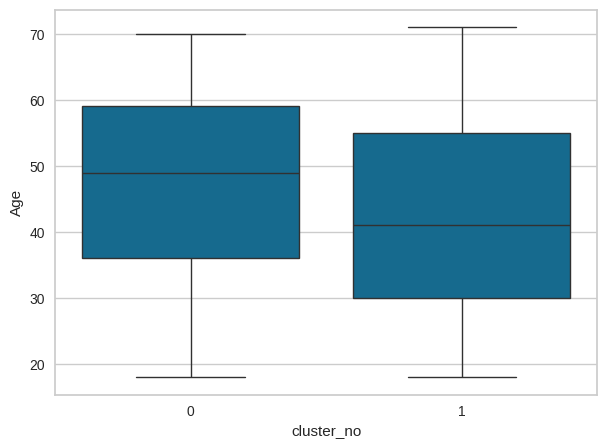

In [263]:
sns.boxplot(x="cluster_no", y="Age", data=df_new)